# End-to-end Dogs vs. Cats Binary Classification
* This notebook builds an end-to-end binary deep learning based image classifier and implement Convolution neural network using TensorFlow(2.2.0).

## 1.Problem
* To classify whether images contain either a dog or a cat.

## 2.Data
* The data we're using is from Kaggle's to distinguish dogs vs cats.

## 3.Evaluation
* The evaluation is a file with prediction probabilities for each dog and cat of each test image.

## 4.Features
#### Some information about the data:

* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* Predict the image is dog or cat (1 = dog, 0 = cat)
* There are around 4,000 images in the training set (these images have labels).
* There are around 1,000 images in the test set (these images have no labels, because we'll want to predict them).




## Import Packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras import optimizers
import os
from os import listdir
import shutil
import cv2
import random
import scipy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
import random



## Explore the Data


In [2]:
cats_train = "./catvdog/training_set/training_set/cats"
dogs_train = "./catvdog/training_set/training_set/dogs"

cats_test = "./catvdog/test_set/test_set/cats"
dogs_test = "./catvdog/test_set/test_set/dogs"


In [3]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
my_data_dir = './catvdog'
os.listdir(my_data_dir) 


['test_set', 'training_set']

In [4]:
# Get filenames in list
Dir=['\\training_set\\training_set\\','\\test_set\\test_set\\']
for i,dir1 in enumerate(Dir):
    path = my_data_dir+dir1
    p=os.listdir(path)
    print(i,p)


0 ['cats', 'dogs']
1 ['cats', 'dogs']


### Lets see sample image


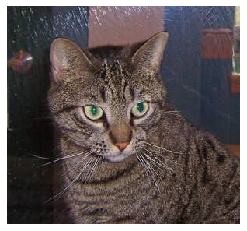

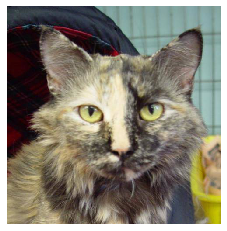

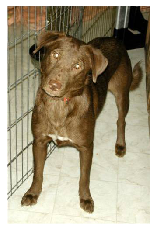

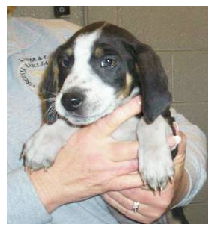

In [5]:
#lets see first two images of each  saree_dir_train, shirt_dir_train, t_shirt_dir_train dataset
Dir=[cats_train, dogs_train]

import matplotlib.image as mpimg
for di in Dir:
    k=listdir(di)
    for i in k[:2]:
        img=mpimg.imread('{}/{}'.format(di,i))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

## Let's check how many images there are in test and train 


In [6]:
print("no of images of cats in train dataset ",len(os.listdir(cats_train)))
print("no of images of dogs in train dataset ",len(os.listdir(dogs_train)))

print("no of images of cats in test dataset ",len(os.listdir(cats_test)))
print("no of images of dogs in test dataset ",len(os.listdir(dogs_test)))



no of images of cats in train dataset  2000
no of images of dogs in train dataset  2000
no of images of cats in test dataset  500
no of images of dogs in test dataset  500


## Building Model


In [7]:
input_shape=(128,128,3)
img_width=128
img_height=128

batch_size=8
epoch=50

train_data_dir='./catvdog/training_set/training_set'
validation_data_dir='./catvdog/test_set/test_set'

nb_train_samples=2000
nb_validation_samples=500

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
print(model.summary())


model.compile(loss='binary_crossentropy', ,metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        1

## Data Augmentation

In [8]:
train_generator_augmented=ImageDataGenerator(
                               rotation_range=30, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1./255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                            )

## Data Preprocessing


In [9]:
# Validation
Data_gen=ImageDataGenerator(rescale=1./255)
validation_generator=Data_gen.flow_from_directory(validation_data_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=12, 
                                                  class_mode='binary',
                                                 shuffle=False)

# Training

train_generator=train_generator_augmented.flow_from_directory(train_data_dir,
                                                              target_size=(img_width,img_height),
                                                              batch_size=batch_size, 
                                                              class_mode='binary')



Found 1000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [10]:
# checking class indices
train_generator.class_indices

{'cats': 0, 'dogs': 1}

## EarlyStopping and ModelCheckpoint

In [11]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
mc = ModelCheckpoint('best_model1.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

## Training

In [12]:
history = model.fit(
    train_generator, 
    epochs=epoch,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    steps_per_epoch=nb_train_samples//batch_size,
    callbacks=[es, mc]
  
)

Epoch 1/50
250/250 [==============================] - ETA: 0s - loss: 0.6979 - accuracy: 0.4980
Epoch 00001: val_accuracy improved from -inf to 0.43280, saving model to best_model1.h5
250/250 [==============================] - 89s 358ms/step - loss: 0.6979 - accuracy: 0.4980 - val_loss: 0.6933 - val_accuracy: 0.4328
Epoch 2/50
250/250 [==============================] - ETA: 0s - loss: 0.6946 - accuracy: 0.4885
Epoch 00002: val_accuracy improved from 0.43280 to 0.46505, saving model to best_model1.h5
250/250 [==============================] - 80s 318ms/step - loss: 0.6946 - accuracy: 0.4885 - val_loss: 0.6925 - val_accuracy: 0.4651
Epoch 3/50
250/250 [==============================] - ETA: 0s - loss: 0.6929 - accuracy: 0.5230
Epoch 00003: val_accuracy did not improve from 0.46505
250/250 [==============================] - 72s 288ms/step - loss: 0.6929 - accuracy: 0.5230 - val_loss: 0.6926 - val_accuracy: 0.4234
Epoch 4/50
250/250 [==============================] - ETA: 0s - loss: 0.6858

Epoch 29/50
250/250 [==============================] - ETA: 0s - loss: 0.5549 - accuracy: 0.7155
Epoch 00029: val_accuracy did not improve from 0.78629
250/250 [==============================] - 52s 208ms/step - loss: 0.5549 - accuracy: 0.7155 - val_loss: 0.5587 - val_accuracy: 0.7339
Epoch 30/50
250/250 [==============================] - ETA: 0s - loss: 0.5581 - accuracy: 0.7190
Epoch 00030: val_accuracy did not improve from 0.78629
250/250 [==============================] - 52s 207ms/step - loss: 0.5581 - accuracy: 0.7190 - val_loss: 0.5196 - val_accuracy: 0.7769
Epoch 31/50
250/250 [==============================] - ETA: 0s - loss: 0.5558 - accuracy: 0.7290
Epoch 00031: val_accuracy did not improve from 0.78629
250/250 [==============================] - 51s 204ms/step - loss: 0.5558 - accuracy: 0.7290 - val_loss: 0.5474 - val_accuracy: 0.7419
Epoch 32/50
250/250 [==============================] - ETA: 0s - loss: 0.5423 - accuracy: 0.7300 ETA: 2s - l
Epoch 00032: val_accuracy improve

In [13]:
#Save our model
from tensorflow.keras.models import load_model
model.save('best_model1.h5')

In [14]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.697897,0.4980,0.693280,0.432796
1,0.694583,0.4885,0.692549,0.465054
2,0.692940,0.5230,0.692585,0.423387
3,0.685842,0.5415,0.644181,0.694892
4,0.686399,0.5520,0.673189,0.670699
5,0.678920,0.5805,0.692084,0.573925
6,0.677664,0.5770,0.675652,0.627688
7,0.665953,0.6110,0.772213,0.462366
8,0.657169,0.6110,0.622362,0.686828
9,0.657061,0.6350,0.610218,0.727151


## Plotting our model Accuracy and Loss


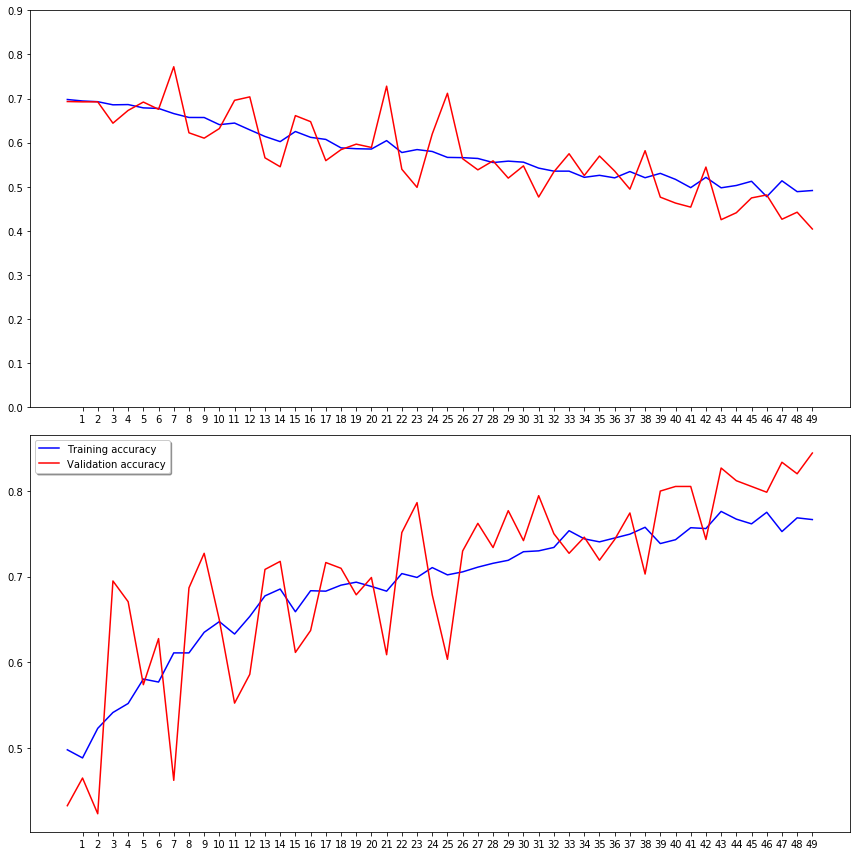

In [15]:
#Virtualize Training
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epoch, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epoch, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [16]:
#lets evaluate our model
model.evaluate(validation_generator)

84/84 [==============================] - 4s 48ms/step - loss: 0.4413 - accuracy: 0.8200 0s - loss: 0.4373 - ac


[0.4413343071937561, 0.8199999928474426]

In [17]:
# As we can see that there are 2 classes for the 1000 test images
validation_generator.classes


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Predicting the Test images using DataFrame


In [24]:
pred = model.predict(validation_generator)

y_classes = pred.argmax(axis=-1)
res = pd.DataFrame()
res['ImageId'] = list(range(1,1001))
res['Predicted_Label'] = y_classes
res['Actual_Label']=validation_generator.classes
res["Predicted_Label"] = res["Predicted_Label"].replace({0: 'Cats', 1: 'Dogs'})
res["Actual_Label"] = res["Actual_Label"].replace({0: 'Cats', 1: 'Dogs'})
res.head(50)


,ImageId,Predicted_Label,Actual_Label
0,1,Cats,Cats
1,2,Cats,Cats
2,3,Cats,Cats
3,4,Cats,Cats
4,5,Cats,Cats
5,6,Cats,Cats
6,7,Cats,Cats
7,8,Cats,Cats
8,9,Cats,Cats
9,10,Cats,Cats


In [25]:
# Lets load our model
saved_model = load_model('best_model1.h5')

## Predicting some image samples¶


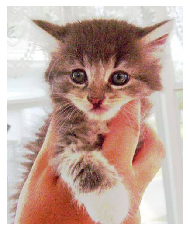

Cat


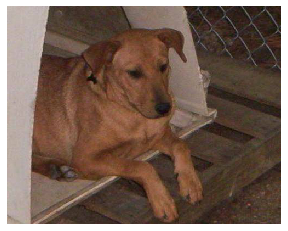

Cat


In [26]:
test_Dir=[cats_train,dogs_train]
Predicted_class=[]
for test_dir in test_Dir:
    k=listdir(test_dir)
    for i in  k[2:3]:
        img= image.load_img('{}/{}'.format(test_dir,i))                         
        test_image = image.load_img('{}/{}'.format(test_dir,i),target_size=(128, 128))
        test_image = image.img_to_array(test_image)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        test_image = np.expand_dims(test_image, axis=0)
        result = saved_model.predict(test_image)
        final=np.argmax(result, axis=1)[0]
        if final==0:
            print("Cat")
        elif final==1:
            print("Dog")